In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software is about the same,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or tool without taking a formal course",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how to do things I didn’t necessarily look for,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a job board","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Courses on technologies you're interested in,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software is about the same,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",NaN,Taken an online course in programming or software development (e.g. a MOOC),NaN,"Developer, desktop or enterprise applications;Developer, front-end",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,"Financial performance or funding status of the company or organization;Specific department or team I'd be working on;Languages, frameworks, and other technologies I'd be working with","Something else changed (education, award, media, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change many aspects of our lives,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how to do things I didn’t necessarily look for,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board but have never used or visited it","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Tech meetups or events in your area;Courses on technologies you're interested in,19.0,Man,No,Straight / Heterosexual,NaN,No,

# Which country pays the highest salary overall for Software Engineers

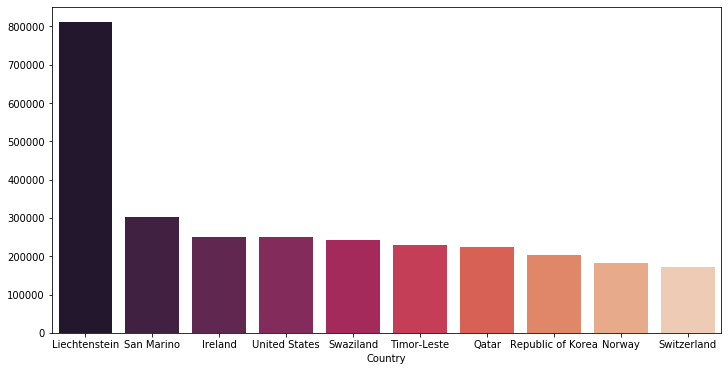

In [272]:
import seaborn as sns
# Remove rows without salary information
df.dropna(subset=['ConvertedComp'], axis=0, inplace=True)
salaries_by_country = df.groupby('Country')['ConvertedComp'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x = salaries_by_country.index[:10], y = salaries_by_country.values[:10], palette='rocket');

- It appears Liechtenstein, San Marino and U.S. pay the highest salaries. 
- However we should also take competition into account. 
- For example, I live in Norway and even though U.S. has a higher annual salary, odds of finding a job in Norway is much higher than U.S. due to high demand in Software Engineers. 

# Does bigger companies pay more?

In [273]:
salaries_by_company_size = df.groupby('OrgSize')['ConvertedComp'].mean().sort_values(ascending=False)

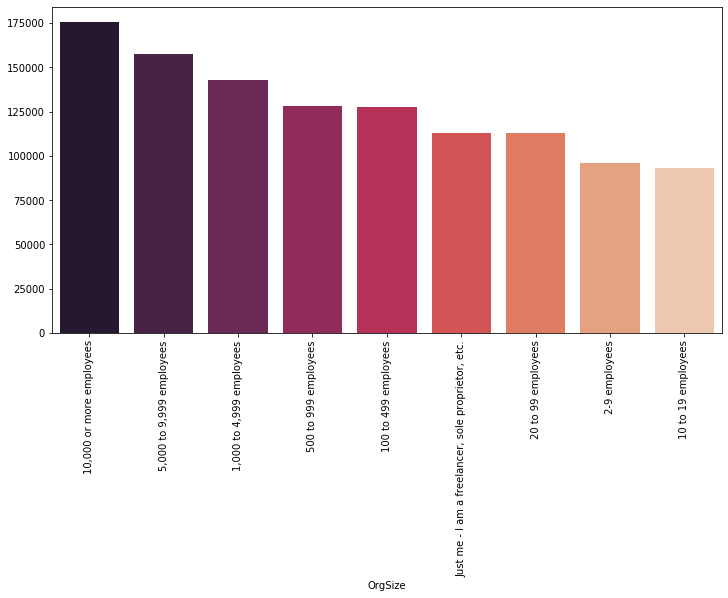

In [274]:
plt.figure(figsize=(12,6))
plt.xticks(plt.xticks()[0], salaries_by_company_size.index, rotation=90)
sns.barplot(x = salaries_by_company_size.index, y = salaries_by_company_size.values, palette='rocket');

- Yes. The salary increases with respect to number of employees for companies that have over 100+ organization size. 
- Under size 100, salaries seem pretty close for freelancers and 20-99 employees. 
- Again, sizes of 2-9 and 10-19 are very similar too. 

# Does education level have any influence on salary?

In [275]:
salaries_by_education = df.groupby('EdLevel')['ConvertedComp'].mean().sort_values(ascending=False)

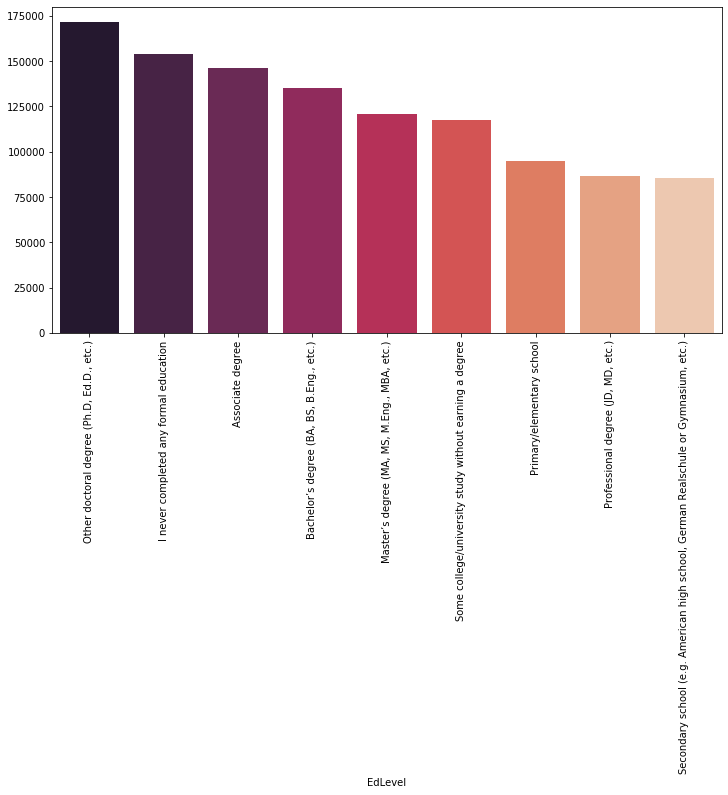

In [276]:
plt.figure(figsize=(12,6))
plt.xticks(plt.xticks()[0], salaries_by_education.index, rotation=90)
sns.barplot(x = salaries_by_education.index, y = salaries_by_education.values, palette='rocket');

- Results are very interesting. Those who have Ph.D get the highest salary. 
- The second highest is developers who have never completed any formal education. 
- Also salaries for B.S. degree is higher than Master's on average. 
- Salaries for associate degree is higher than B.S. as well.
- We can't really say that education level has a clear impact on salaries

# Bonus: Blockchain usage by Company Size

In [296]:
# Redefine df to bring back dropped rows
df = pd.read_csv('./survey_results_public.csv')
# Drop  missing rows that doesn't specify usage of blockchain at an organization
df.dropna(subset=['BlockchainOrg'], axis=0, inplace=True)

In [306]:
# Check percentage of missing values
df['OrgSize'].isna().sum() / len(df) * 100

2.8458744161909704

In [300]:
# We are only missing 2.84% of the rows. We can just fill them using the column mode
fill_mode = lambda col: col.fillna(col.mode())
df = df.apply(fill_mode, axis=0)

In [301]:
blockchain_by_company_size = df.groupby('BlockchainOrg')['OrgSize'].value_counts()

In [302]:
blockchain_by_company_size = blockchain_by_company_size.unstack(level=1)

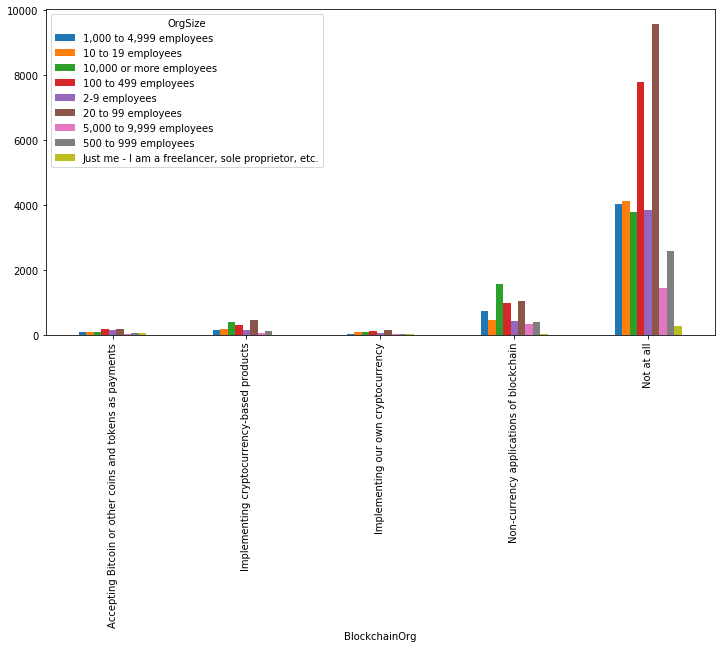

In [303]:
blockchain_by_company_size.plot.bar(figsize=(12,6));

- We see that most of the companies(large or small) did not start using blockchain.
- Between those are using it, companies that have 10000+ employees are the ones that are using it the most. 
- We can also see that blockchain is mostly used for Non-currency applications. 